In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:

# 1. Load the CSV file into a DataFrame.
csv_file = "/Users/prasadpilankar/Documents/BAN/DE2025/DataCenterInfra/DataCenters-Infra-Expansion-CapstoneProject/clean-data/DC-CleanedData.csv"
df = pd.read_csv(csv_file)

In [3]:

# 2. Explore the data briefly.
print("Head of the DataFrame:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())


Head of the DataFrame:
  STATE     CITY                LOCATION  ENERGY    AREA  IT EQUIPMENT POWER  \
0    FL    Miami    36 NE 2nd St (MIA10)     1.3   10200                0.91   
1    FL    Miami        RadiusDC Miami I     9.2   15795                6.44   
2    FL    Miami          Volico Miami 2    10.0    5000                7.00   
3    FL    Miami             Raeden MIA2     3.0   32000                2.10   
4    FL  Orlando  CoreSite Orlando (OR1)     7.0  130000                4.90   

   State_Aggregated_PUE  FULL_CABINETS  PARTIAL_CABINETS  SHARED_RACKSPACE  \
0                   1.8           True              True              True   
1                   1.8           True              True              True   
2                   1.8           True              True              True   
3                   1.8           True              True              True   
4                   1.8           True              True              True   

   CAGES  SUITES  BUILD_TO_

In [4]:
df['LOCATION_ID'] = pd.factorize(df['LOCATION'])[0] + 1
# df['STATE_ID'] = pd.factorize(df['STATE'])[0] + 1
# df['CITY_ID'] = pd.factorize(df['CITY'])[0] + 1
df[['LOCATION', 'LOCATION_ID']]

,LOCATION,LOCATION_ID
0,36 NE 2nd St (MIA10),1
1,RadiusDC Miami I,2
2,Volico Miami 2,3
3,Raeden MIA2,4
4,CoreSite Orlando (OR1),5
5,Signal Hill Telecom Center,6
6,Ark Data Centers Boise 1,7
7,Tonaquint Boise Data Center,8
8,60 Hudson Street (JFK12),9
9,111 Eight Avenue (JFK10),10


In [5]:

# 3. Preprocessing - Encode categorical variables (such as state and city) using one-hot encoding.
#    (If there are other categorical features, they will be automatically encoded too.)
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('LOCATION','Location_ID')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nDataFrame after encoding categorical variables:")
df_encoded.head()


DataFrame after encoding categorical variables:


,LOCATION,ENERGY,AREA,IT EQUIPMENT POWER,State_Aggregated_PUE,FULL_CABINETS,PARTIAL_CABINETS,SHARED_RACKSPACE,CAGES,SUITES,...,STATE_VA,STATE_WA,CITY_Boise,CITY_Garden City,CITY_Los Angeles,CITY_Miami,CITY_New York,CITY_Orangeburg,CITY_Orlando,CITY_Seattle
0,36 NE 2nd St (MIA10),1.3,10200,0.91,1.8,True,True,True,True,True,...,0,0,0,0,0,1,0,0,0,0
1,RadiusDC Miami I,9.2,15795,6.44,1.8,True,True,True,True,True,...,0,0,0,0,0,1,0,0,0,0
2,Volico Miami 2,10.0,5000,7.00,1.8,True,True,True,True,True,...,0,0,0,0,0,1,0,0,0,0
3,Raeden MIA2,3.0,32000,2.10,1.8,True,True,True,True,True,...,0,0,0,0,0,1,0,0,0,0
4,CoreSite Orlando (OR1),7.0,130000,4.90,1.8,True,True,True,True,True,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df_encoded.columns

Index(['LOCATION', 'ENERGY', 'AREA', 'IT EQUIPMENT POWER',
       'State_Aggregated_PUE', 'FULL_CABINETS', 'PARTIAL_CABINETS',
       'SHARED_RACKSPACE', 'CAGES', 'SUITES', 'BUILD_TO_SUIT', 'FOOTPRINTS',
       'REMOTE_HANDS', 'YEAR_OPERATIONAL', 'INTERNET_EXCHANGE_POINTS',
       'State_Aggregated_IXP_Count', 'LOCATION_ID', 'STATE_FL', 'STATE_ID',
       'STATE_NY', 'STATE_VA', 'STATE_WA', 'CITY_Boise', 'CITY_Garden City',
       'CITY_Los Angeles', 'CITY_Miami', 'CITY_New York', 'CITY_Orangeburg',
       'CITY_Orlando', 'CITY_Seattle'],
      dtype='object')

In [7]:
# 4. Handle missing values if any remain - here we fill numeric missing values with the column mean.
df_encoded.fillna(df_encoded.mean(), inplace=True) 
df_encoded['Location_ID'] = df_encoded['LOCATION_ID'].astype('category')
# df_encoded['S'] = df_encoded['Location_ID'].astype('category')
drop_cols = ['LOCATION']
df_encoded.drop(columns=drop_cols, inplace=True)
print("\nDataFrame after dropping unnecessary columns:")
df_encoded.head()


DataFrame after dropping unnecessary columns:


<ipython-input-7-81f1e0720a22>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_encoded.fillna(df_encoded.mean(), inplace=True)


,ENERGY,AREA,IT EQUIPMENT POWER,State_Aggregated_PUE,FULL_CABINETS,PARTIAL_CABINETS,SHARED_RACKSPACE,CAGES,SUITES,BUILD_TO_SUIT,...,STATE_WA,CITY_Boise,CITY_Garden City,CITY_Los Angeles,CITY_Miami,CITY_New York,CITY_Orangeburg,CITY_Orlando,CITY_Seattle,Location_ID
0,1.3,10200,0.91,1.8,True,True,True,True,True,True,...,0,0,0,0,1,0,0,0,0,1
1,9.2,15795,6.44,1.8,True,True,True,True,True,True,...,0,0,0,0,1,0,0,0,0,2
2,10.0,5000,7.00,1.8,True,True,True,True,True,True,...,0,0,0,0,1,0,0,0,0,3
3,3.0,32000,2.10,1.8,True,True,True,True,True,True,...,0,0,0,0,1,0,0,0,0,4
4,7.0,130000,4.90,1.8,True,True,True,True,True,False,...,0,0,0,0,0,0,0,1,0,5


In [8]:
# 5. Scale all features.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_encoded)

/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

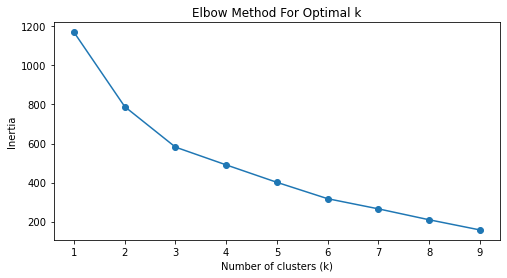

In [9]:
# 6. (Optional) Use the Elbow Method to find a reasonable number of clusters.
inertia = []
K = range(1, 10)
for k in K:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(data_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:

# 7. Choose the number of clusters for analysis (e.g., 3 or 4).
#    You can adjust n_clusters based on the elbow plot or your requirements.
n_clusters = 3  # Change this to the desired number of clusters based on the elbow method or domain knowledge.

In [11]:

# 8. Perform KMeans clustering.
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:

# 9. Add the cluster labels back to the original DataFrame.
df['Cluster'] = clusters

print("\nCluster counts:")
print(df['Cluster'].value_counts())



Cluster counts:
2    16
0    13
1    10
Name: Cluster, dtype: int64


In [13]:
# 10. Evaluate the clustering quality using the silhouette score.
sil_score = silhouette_score(data_scaled, clusters)
print(f"\nSilhouette Score for {n_clusters} clusters: {sil_score:.3f}")


Silhouette Score for 3 clusters: 0.397


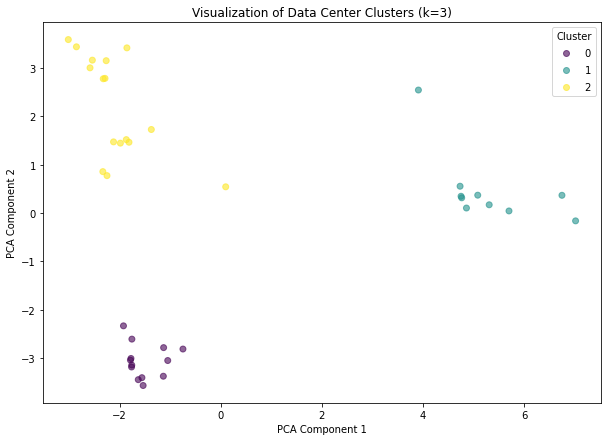


Cluster Summary (mean values):
            ENERGY           AREA  IT EQUIPMENT POWER  State_Aggregated_PUE  \
Cluster                                                                       
0         9.692308   85310.923077            6.784615               1.22000   
1        36.900000  178514.600000           25.830000               1.21000   
2         6.750000   68412.187500            4.725000               1.61875   

         FULL_CABINETS  PARTIAL_CABINETS  SHARED_RACKSPACE  CAGES  SUITES  \
Cluster                                                                     
0               1.0000            1.0000               1.0    1.0     1.0   
1               0.0000            0.0000               0.0    0.0     0.0   
2               0.9375            0.9375               1.0    1.0     1.0   

         BUILD_TO_SUIT  FOOTPRINTS  REMOTE_HANDS  YEAR_OPERATIONAL  \
Cluster                                                              
0             0.923077         1.0           1

<ipython-input-14-80f09b811d13>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


In [14]:
# 11. Use PCA to reduce data dimensionality for visualization (2 components).
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Visualization of Data Center Clusters (k={n_clusters})")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

# 12. (Optional) Explore the cluster profiles by calculating mean values of features per cluster.
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary (mean values):")
print(cluster_summary)

In [15]:
output_csv_file = "/Users/prasadpilankar/Documents/BAN/DE2025/DataCenterInfra/DataCenters-Infra-Expansion-CapstoneProject/clean-data/DC-ClusteredData.csv"
df.to_csv(output_csv_file, index=False)
print(f"Clustered data has been saved to {output_csv_file}")

Clustered data has been saved to /Users/prasadpilankar/Documents/BAN/DE2025/DataCenterInfra/DataCenters-Infra-Expansion-CapstoneProject/clean-data/DC-ClusteredData.csv
